In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import yahoofinancials
import seaborn as sns
import datetime
from datetime import date
import matplotlib.pyplot as plt

In [2]:
today = str(date.today())
print(today)

2021-11-06


In [3]:
# one way to download historical data...
yf.pdr_override() 
df = pdr.get_data_yahoo("RUB=X", start="2020-01-01", end=today)
df1 = pdr.get_data_yahoo("CL=F", start="2020-01-01", end=today)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,61.972500,62.279999,61.925999,61.971100,61.971100,0
2020-01-01,62.028301,62.028301,62.028301,62.028301,62.028301,0
2020-01-02,61.830002,62.147999,61.563000,61.830002,61.830002,0
2020-01-03,61.694199,62.224998,61.694199,61.694199,61.694199,0
2020-01-06,62.013802,62.323002,61.717499,62.029999,62.029999,0


In [5]:
##### cleaner way to import data from Yahoo Finance
today = date.today()
d = datetime.timedelta(days=100)
start = today - d

In [6]:
def plot_tickers(tickers, start, end, interval, track, log_plot, normalize):
    data_df = yf.download(tickers,
                          start=start,
                          end=end,
                          interval=interval,
                          progress=False)

    # Drop any NaNs 
    data_df = data_df.dropna()

    # normalize df
    if normalize == True:
        data_df = (data_df - data_df.mean()) / data_df.std()
    else:
        pass

    # Plot tickers
    ticker_list = tickers.split(' ')

    for ticker in ticker_list:
        if ticker == 'BTC-USD':  
            ax = data_df[track, ticker].plot(secondary_y=True, figsize=(14, 10), legend=True, logy=log_plot, grid=True)
        else:
            ax = data_df[track, ticker].plot(figsize=(14, 10), legend=True, logy=log_plot, grid=True)

    ax.get_legend().set_bbox_to_anchor((1.3, 1))

    return data_df


def calc_correlation(data_df, track):
    # Get correlation and sort by sum
    sum_corr = data_df[track].corr().sum().sort_values(ascending=True).index.values

    data_df[track][sum_corr].corr()

    # Call the df with the list from summed correlation, sorted ascending.
    plt.figure(figsize=(13, 8))
    ax = sns.heatmap(data_df[track][sum_corr].corr(),
                     annot=True,
                     cmap="Blues")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

In [7]:
# Enter tickers to plot/compare
tickers = 'RUB=X CL=F'

# Timeframe
start = '{}'.format(start)
end = '{}'.format(today)

# Time interval: can be 1m, 1h, 1d
interval = '1h'

# key to track: 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'
track = 'Close'

# plot options
log_plot = False
normalize = False

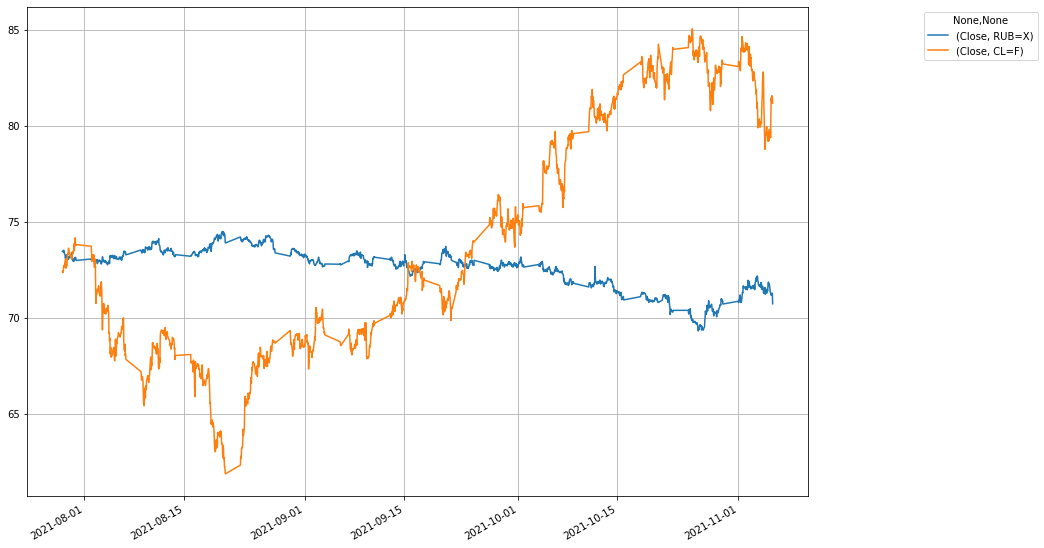

In [8]:
data_df = plot_tickers(tickers, start, end, interval, track, log_plot, normalize)

In [9]:
data_df.head(5)

Adj Close                 Close             \
                                CL=F      RUB=X       CL=F      RUB=X   
2021-07-28 22:00:00+00:00  72.419998  73.452003  72.419998  73.452003   
2021-07-28 23:00:00+00:00  72.419998  73.432098  72.419998  73.432098   
2021-07-29 00:00:00+00:00  72.349998  73.432999  72.349998  73.432999   
2021-07-29 01:00:00+00:00  72.449997  73.444000  72.449997  73.444000   
2021-07-29 02:00:00+00:00  72.699997  73.514397  72.699997  73.514397   

                                High                   Low             \
                                CL=F      RUB=X       CL=F      RUB=X   
2021-07-28 22:00:00+00:00  72.480003  73.463203  72.370003  73.328003   
2021-07-28 23:00:00+00:00  72.440002  73.465302  72.349998  73.314003   
2021-07-29 00:00:00+00:00  72.449997  73.511200  72.290001  73.416000   
2021-07-29 01:00:00+00:00  72.459999  73.538002  72.260002  73.417000   
2021-07-29 02:00:00+00:00  72.760002  73.527000  72.440002  73.426003   

                                Open             Volume        
                                CL=F      RUB=X    CL=F RUB=X  
2021-07-28 22:00:00+00:00  72.400002  73.439003     0.0   0.0  
2021-07-28 23:00:00+00:00  72.430000  73.436501   735.0   0.0  
2021-07-29 00:00:00+00:00  72.410004  73.433296  2482.0   0.0  
2021-07-29 01:00:00+00:00  72.349998  73.491898  4058.0   0.0  
2021-07-29 02:00:00+00:00  72.440002  73.457001  6039.0   0.0

In [10]:
# calculate correlation without shift
sum_corr = data_df[track].corr().sum().sort_values(ascending=True).index.values
data_df[track][sum_corr].corr()

,CL=F,RUB=X
CL=F,1.000000,-0.920239
RUB=X,-0.920239,1.000000


In [11]:
df = data_df["Close"]
df.head(10)

,CL=F,RUB=X
2021-07-28 22:00:00+00:00,72.419998,73.452003
2021-07-28 23:00:00+00:00,72.419998,73.432098
2021-07-29 00:00:00+00:00,72.349998,73.432999
2021-07-29 01:00:00+00:00,72.449997,73.444000
2021-07-29 02:00:00+00:00,72.699997,73.514397
2021-07-29 03:00:00+00:00,72.629997,73.421997
2021-07-29 04:00:00+00:00,72.660004,73.445000
2021-07-29 05:00:00+00:00,72.769997,73.321999
2021-07-29 06:00:00+00:00,72.839996,73.294502
2021-07-29 07:00:00+00:00,73.000000,73.228798


In [12]:
# save this df to csv
df = df.to_csv('df.csv')

In [13]:
# shift Ruble to Crude and find optimum shift 
n = -10
d = {}
for i in range(25):
    df = pd.read_csv('df.csv')
    df['RUB=X'] = df["RUB=X"].shift(n)
    df = df.dropna()
    
    sum_corr = df.corr().sum().sort_values(ascending=True).index.values

    cor = df[sum_corr].corr()
    
    c = cor['CL=F'].iloc[-1]
    
    n += 1
    
    d[n] = c

all_values = d.values()
min_value = min(all_values)
min_key = min(d, key=d.get)

improvement = str(round(100 - (((cor['CL=F'].iloc[-1]) / min_value) * 100),4)) + "% improvement after shift"
result = "Shift: " + str(min_key) + " * " + interval + "\n" + "Correlation after shift: " + str(min_value)

print(result)
print(improvement)

Shift: 1 * 1h
Correlation after shift: -0.9202392432036073
1.3355% improvement after shift


In [14]:
# shift Ruble 
df = pd.read_csv('df.csv')

df['RUB=X'] = df["RUB=X"].shift(0)
df = df.dropna()

# calculate shifted correlation
sum_corr = df.corr().sum().sort_values(ascending=True).index.values

cor = df[sum_corr].corr()
cor

,CL=F,RUB=X
CL=F,1.000000,-0.920239
RUB=X,-0.920239,1.000000


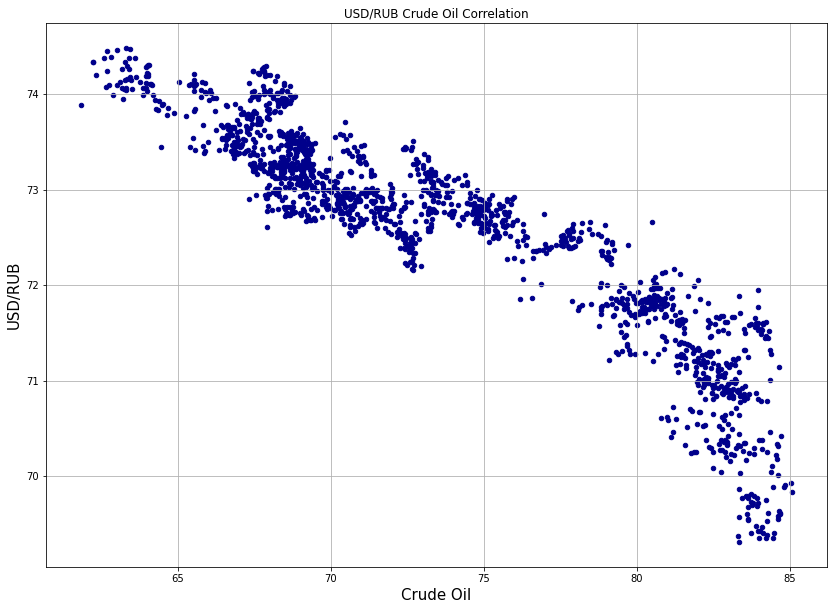

In [15]:
ax = df.plot.scatter(x='CL=F', y='RUB=X', c='DarkBlue', figsize=(14,10))

ax.set_xlabel('Crude Oil', fontsize=15)
ax.set_ylabel("USD/RUB", fontsize=15)
ax.set_title('USD/RUB Crude Oil Correlation')

ax.grid(True)

plt.savefig("correlation.png")

In [16]:
df_pct = pd.DataFrame()
df_pct["CL=F"] = df["CL=F"]
df_pct["RUB=X"] = df["RUB=X"]
df_pct = df_pct.pct_change()

In [17]:
df_pct

,CL=F,RUB=X
0,NaN,NaN
1,0.000000,-0.000271
2,-0.000967,0.000012
3,0.001382,0.000150
4,0.003451,0.000959
...,...,...
1583,-0.001719,-0.000185
1584,0.003568,0.001040
1585,-0.001716,0.000576
1586,0.000860,-0.000116


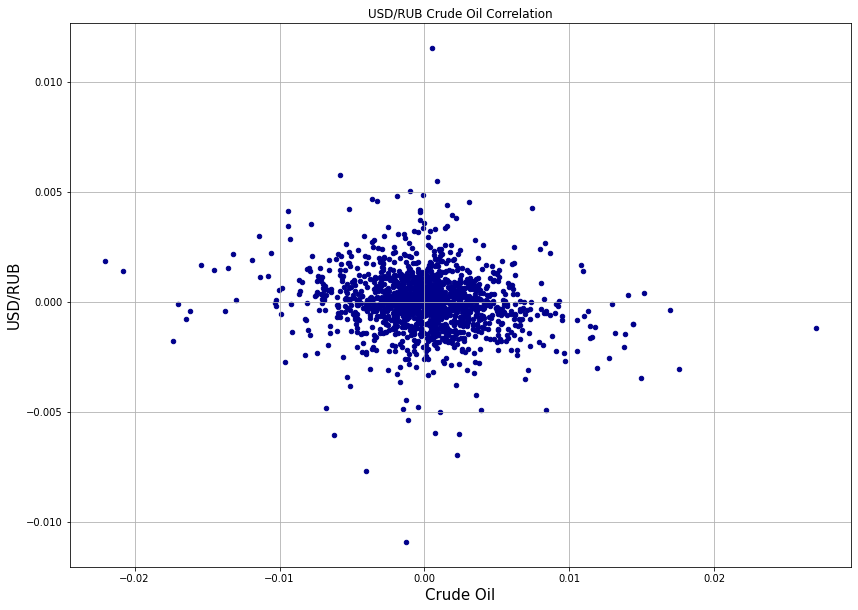

In [18]:
ax = df_pct.plot.scatter(x='CL=F', y='RUB=X', c='DarkBlue', figsize=(14,10))

ax.set_xlabel('Crude Oil', fontsize=15)
ax.set_ylabel("USD/RUB", fontsize=15)
ax.set_title('USD/RUB Crude Oil Correlation')

ax.grid(True)

plt.savefig("correlation.png")

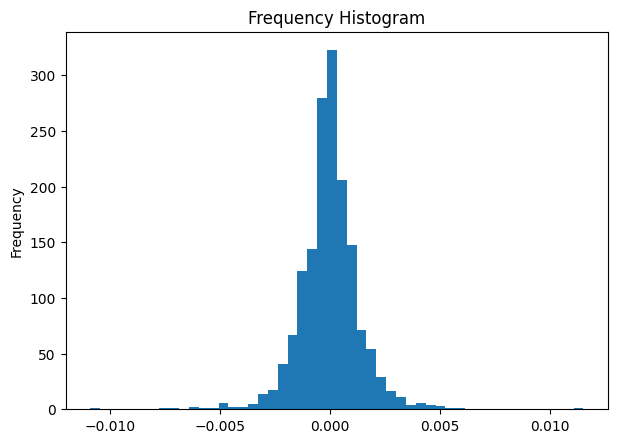

In [19]:
l = df_pct['RUB=X'].to_list()
a = sorted(l, key=float)
len(a)
n = list(range(len(a)))


%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x

plt.hist(a, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');